In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
df_final = pd.read_csv('final_with_indobert_jw.csv')
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        100 non-null    int64  
 1   baseline_wer                100 non-null    float64
 2   baseline_cer                100 non-null    float64
 3   baseline_pmr                100 non-null    float64
 4   baseline_bleu               100 non-null    float64
 5   baseline_cosine             100 non-null    float64
 6   baseline_indobert           100 non-null    object 
 7   final_symspell_wer          100 non-null    float64
 8   final_symspell_cer          100 non-null    float64
 9   final_symspell_pmr          100 non-null    float64
 10  final_symspell_bleu         100 non-null    float64
 11  final_symspell_cosine       100 non-null    float64
 12  final_symspell_indobert     100 non-null    object 
 13  final_llm_wer               100 non-

In [4]:
df_text = pd.read_csv('text_processing/error_correction_result.csv', 
                      usecols=['name','llm_wer','llm_cer','llm_pmr','llm_bleu','llm_cosine','llm_indobert_P','llm_indobert_R','llm_indobert_F1','llm_jw',
                               'symspell_wer','symspell_cer','symspell_pmr','symspell_bleu','symspell_cosine','symspell_indobert_P','symspell_indobert_R','symspell_indobert_F1','symspell_jw'])
df_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  100 non-null    int64  
 1   llm_wer               100 non-null    float64
 2   llm_cer               100 non-null    float64
 3   llm_pmr               100 non-null    float64
 4   llm_bleu              100 non-null    float64
 5   llm_cosine            100 non-null    float64
 6   llm_jw                100 non-null    float64
 7   symspell_wer          100 non-null    float64
 8   symspell_cer          100 non-null    float64
 9   symspell_pmr          100 non-null    float64
 10  symspell_bleu         100 non-null    float64
 11  symspell_cosine       100 non-null    float64
 12  symspell_jw           100 non-null    float64
 13  llm_indobert_P        100 non-null    float64
 14  llm_indobert_R        100 non-null    float64
 15  llm_indobert_F1       10

In [5]:
df_yolo = pd.read_csv('object_detection/yolo_final_result.csv', 
                      usecols=['name','yolo_wer','yolo_cer','yolo_pmr','yolo_bleu','yolo_cosine','yolo_indobert_P','yolo_indobert_R','yolo_indobert_F1','yolo_jw'])
df_yolo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              100 non-null    int64  
 1   yolo_wer          100 non-null    float64
 2   yolo_cer          100 non-null    float64
 3   yolo_pmr          100 non-null    float64
 4   yolo_bleu         100 non-null    float64
 5   yolo_cosine       100 non-null    float64
 6   yolo_jw           100 non-null    float64
 7   yolo_indobert_P   100 non-null    float64
 8   yolo_indobert_R   100 non-null    float64
 9   yolo_indobert_F1  100 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 7.9 KB


In [6]:
df_merged = df_final.merge(df_text, on='name', how='inner') \
               .merge(df_yolo, on='name', how='inner')
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        100 non-null    int64  
 1   baseline_wer                100 non-null    float64
 2   baseline_cer                100 non-null    float64
 3   baseline_pmr                100 non-null    float64
 4   baseline_bleu               100 non-null    float64
 5   baseline_cosine             100 non-null    float64
 6   baseline_indobert           100 non-null    object 
 7   final_symspell_wer          100 non-null    float64
 8   final_symspell_cer          100 non-null    float64
 9   final_symspell_pmr          100 non-null    float64
 10  final_symspell_bleu         100 non-null    float64
 11  final_symspell_cosine       100 non-null    float64
 12  final_symspell_indobert     100 non-null    object 
 13  final_llm_wer               100 non-

In [9]:
df_indobert = df_merged[[col for col in df_merged.columns if 'indobert' in col]]
df_indobert.describe()

,baseline_indobert_P,baseline_indobert_R,baseline_indobert_F1,final_symspell_indobert_P,final_symspell_indobert_R,final_symspell_indobert_F1,final_llm_indobert_P,final_llm_indobert_R,final_llm_indobert_F1,llm_indobert_P,llm_indobert_R,llm_indobert_F1,symspell_indobert_P,symspell_indobert_R,symspell_indobert_F1,yolo_indobert_P,yolo_indobert_R,yolo_indobert_F1
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.918677,0.937881,0.927779,0.935379,0.931343,0.932791,0.939799,0.934322,0.936471,0.932675,0.943623,0.937941,0.917603,0.935619,0.926106,0.937319,0.934492,0.935334
std,0.104062,0.086416,0.095525,0.131471,0.149213,0.141687,0.130914,0.149003,0.141276,0.089456,0.079788,0.084729,0.101737,0.084183,0.093209,0.133740,0.151013,0.143713
min,0.330638,0.422308,0.370893,0.363408,0.259289,0.312846,0.364234,0.259289,0.312846,0.317531,0.426995,0.364216,0.330559,0.430072,0.373806,0.362765,0.259289,0.312846
25%,0.914210,0.940922,0.926669,0.954717,0.955178,0.953491,0.959933,0.958691,0.959816,0.919657,0.942152,0.927664,0.912104,0.938712,0.923440,0.959044,0.960545,0.958535
50%,0.950369,0.963137,0.956041,0.973818,0.970577,0.971917,0.979405,0.976226,0.977810,0.959347,0.963167,0.960016,0.947319,0.957988,0.952806,0.978369,0.982097,0.978863
75%,0.969418,0.977181,0.972817,0.989205,0.989280,0.989597,0.991243,0.991136,0.991104,0.977684,0.978211,0.977963,0.968198,0.975475,0.971910,0.993008,0.993031,0.992626
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999416,0.998911,0.999164,0.998542,0.998529,0.998536,1.000000,1.000000,1.000000


C:\Users\Asus\AppData\Local\Temp\ipykernel_25888\2055687787.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(means.index, rotation=45, ha="right")
C:\Users\Asus\AppData\Local\Temp\ipykernel_25888\2055687787.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(means.index, rotation=45, ha="right")
C:\Users\Asus\AppData\Local\Temp\ipykernel_25888\2055687787.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(means.index, rotation=45, ha="right")
C:\Users\Asus\AppData\Local\Temp\ipykernel_25888\2055687787.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(means.index, rotation=

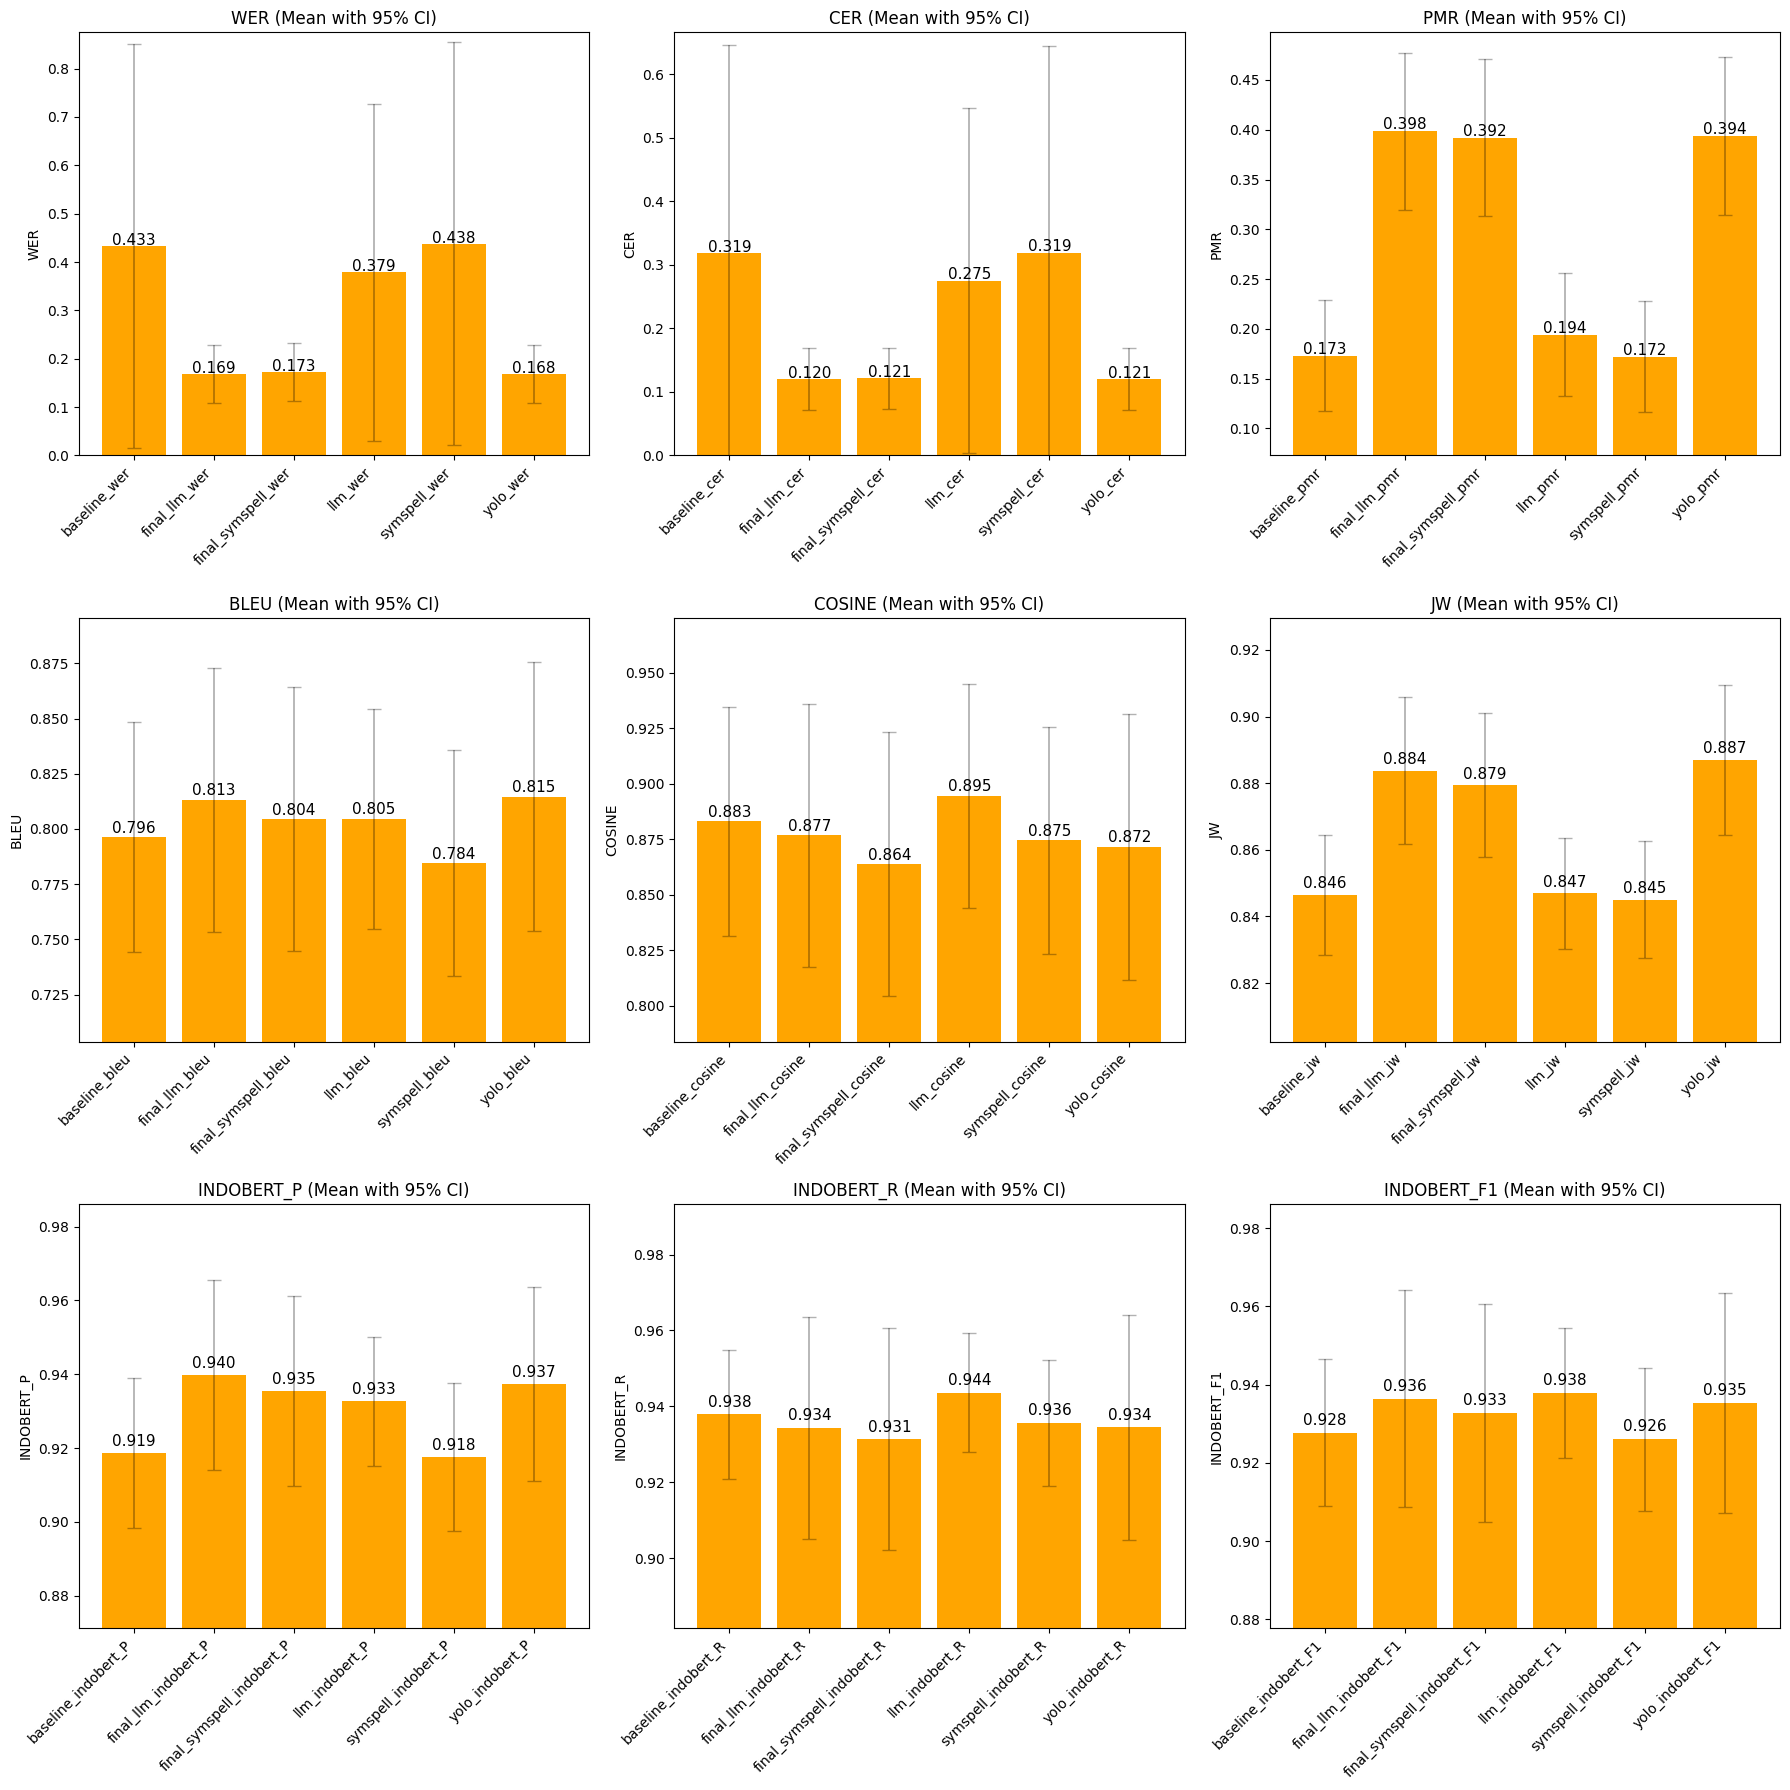

In [8]:
metrics = ["wer", "cer", "pmr", "bleu", "cosine", "jw", "indobert_P", "indobert_R", "indobert_F1"]

fig, axes = plt.subplots(3, 3, figsize=(18, 18))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    ax = axes[i]
    
    metric_cols = [col for col in df_merged.columns if col.endswith(metric)]
    data = df_merged[metric_cols]

    means = data.mean()
    std = data.std()
    n = len(data)
    ci95 = 1.96 * std / np.sqrt(n)

    means = means.sort_index()
    ci95 = ci95.loc[means.index]

    ax.bar(means.index, means.values, yerr=ci95.values, color='orange',
           capsize=5, linewidth=1.3, error_kw=dict(lw=1.3, alpha=0.3))

    y_min = means.min() - ci95.max() - 0.02
    y_min = y_min if y_min > 0 else 0.0
    y_max = means.max() + ci95.max() + 0.02
    ax.set_ylim(y_min, y_max)

    for idx, val in enumerate(means.values):
        ax.text(idx, val + 0.002, f"{val:.3f}", ha="center", fontsize=11)

    ax.set_title(f"{metric.upper()} (Mean with 95% CI)", fontsize=12)
    ax.set_ylabel(metric.upper())
    ax.set_xticklabels(means.index, rotation=45, ha="right")


plt.tight_layout()
plt.show()